In [39]:
import numpy as np
from scipy.optimize import minimize
from qiskit import *
%matplotlib inline

In [40]:
L = 6
thetas = np.random.uniform(0, 2*np.pi, 2*L+2) # initial parameters

In [41]:
def prepare_circuit(thetas):
    qreg = QuantumRegister(L, 'q')
    creg = ClassicalRegister(2, 'c')
    circ = QuantumCircuit(qreg, creg)
    for i,t in enumerate(thetas[:L]):
        circ.ry(t, i)
    circ.cz(5,4)
    circ.cz(5,3)
    circ.cz(5,1)
    circ.cz(4,2)
    circ.cz(4,0)
    for i,t in enumerate(thetas[L:2*L]):
        circ.ry(t, i)
    circ.cz(5,4)
    circ.cz(5,2)
    circ.cz(4,3)
    circ.cz(5,0)
    circ.cz(4,1)
    circ.ry(thetas[2*L], 4)
    circ.ry(thetas[2*L+1], 5)
    circ.measure(qreg[4], creg[0])
    circ.measure(qreg[5], creg[1])
    return circ

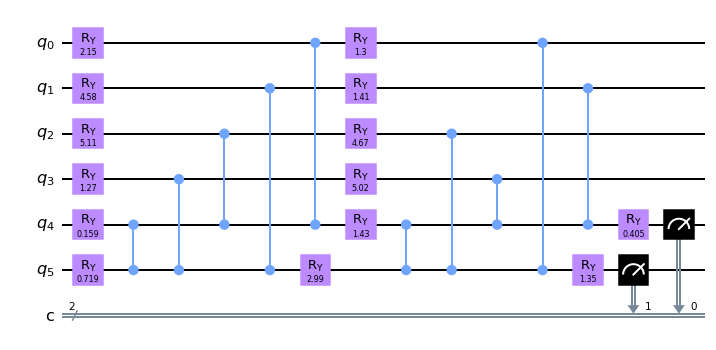

In [42]:
circ = prepare_circuit(thetas)
circ.draw('mpl') # trash qubits are at the bottom

In [43]:
# Use Aer's qasm_simulator
backend_sim = Aer.get_backend('qasm_simulator')

def run_circuit(thetas):
    circ = prepare_circuit(thetas)

    # Execute the circuit on the qasm simulator.
    job_sim = execute(circ, backend_sim, shots=100, memory=True)

    # Grab the results from the job.
    result_sim = job_sim.result()

    counts = result_sim.get_counts(circ)
#     print(counts)
    
    mems = result_sim.get_memory(circ)
#     print(mems)
    return counts

In [44]:
run_circuit(thetas)['00']

27

In [45]:
def cost_function(thetas):
    cost = 0
    out = run_circuit(thetas)
    cost = out.get('11', 0)*2 + out.get('01', 0) + out.get('10', 0)
    return cost/100 # due to the 100 shots

In [46]:
cost_function(thetas)

0.78

In [47]:
# result = minimize(cost_function, thetas, method='BFGS', options={'maxiter': 10})
result = minimize(cost_function, thetas, method='Powell', options={'maxiter': 10, 'ftol': 0.01})

In [48]:
print(result.fun) # cost function after optimization
print(result.x) # optimized parameters

0.08
[ 3.31245517 10.55401208  6.7930748   3.64925027  1.67305754  0.02084847
  6.95929701  2.4618587   4.47459938  0.97395419  2.1346659  -0.30972849
  0.31129307 -0.03193944]
